In [1]:
import json

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from collections import Counter

In [3]:
data = [json.loads(line) for line in open('Datasets/SST/data/dev.jsonl')]

In [4]:
labels = [d['label'] for d in data]

In [5]:
Counter(labels)

Counter({1: 444, 0: 428})

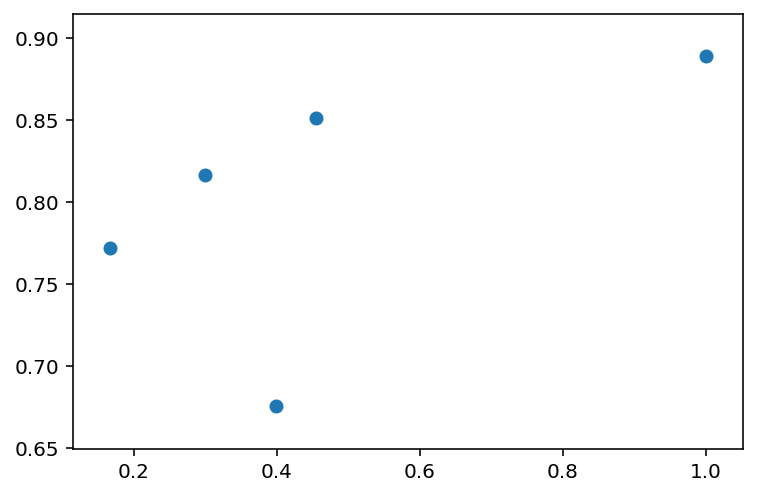

In [16]:
lengths_r = np.array([len(d['rationales']) for d in tao_rationale])
lengths_d = np.array([len(d['metadata']['tokens']) for d in rationales])

0.2302618108886178 0.783256880733945
0.4307963836599277 0.8279816513761468
0.6293864246805252 0.8658256880733946
0.829920997451835 0.875
1.0 0.8910550458715596
0.2302618108886178 0.7763761467889908
0.4307963836599277 0.823394495412844
0.6293864246805252 0.8463302752293578
0.829920997451835 0.8543577981651376
1.0 0.8910550458715596


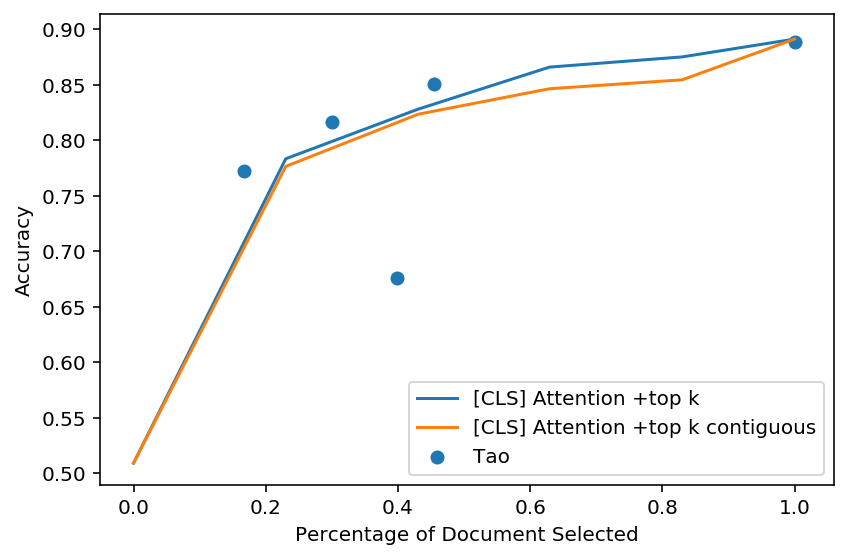

In [13]:
name = {'top_k' : 'top k', 'max_length' : 'top k contiguous'}
for saliency in ['wrapper'] : #, 'simple_gradient', 'integrated_gradient'] :
    for rat in ['top_k', 'max_length'] :
        ps = []
        acc = []
        for p in [20, 40, 60, 80, 100] :
            rationales = [json.loads(line) 
                          for line in open(f'outputs/bert_classification/SST/bert_base_uncased/{saliency}_saliency/{rat}_rationale/MAX_LENGTH_PERCENT={p}/dev.jsonl')]
            lengths_d = np.array([len(x['document'].split()) for x in data[:len(rationales)]])
            lengths_r = np.array([len(x['document'].split()) for x in rationales])
            metrics = json.load(open(f'outputs/bert_classification/SST/bert_base_uncased/{saliency}_saliency/{rat}_rationale/MAX_LENGTH_PERCENT={p}/model_b/metrics.json'))
            print(np.mean(lengths_r/lengths_d), metrics['best_validation_accuracy'])
            ps.append(np.mean(lengths_r/lengths_d))
            acc.append(metrics['best_validation_accuracy'])
        plt.plot([0] + ps, [0.509] + acc, label= '[CLS] Attention +' + name[rat])
        
ps , acc = [], []
for r in [0.2, 0.4, 0.6, 0.8, 1.0] :
    metrics = json.load(open(f'outputs/bert_encoder_generator/SST/run_1_enc_gen/{r}/metrics.json'))
    ps.append(metrics['best_validation__rat_length'])
    acc.append(metrics['best_validation_accuracy'])
    
plt.scatter(ps, acc, label='Tao')
        
plt.xlabel('Percentage of Document Selected')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend()
plt.savefig('sst-max-length-length.pdf')